<a href="https://colab.research.google.com/github/UznetDev/Data-science-homework/blob/main/DAY_10_home_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Ob havo ma'lumotlari buyicha tahlil olib boramiz**

#### *Kerakliy kutubxonalarni chaqirib olamiz va datasetimizni uqib olamiz*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('GlobalWeatherRepository.csv')
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


# New section

In [ ]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

##### *Headmap yaratib ma'lumotlarimiz bog'liklegini kuramiz*



<Axes: >

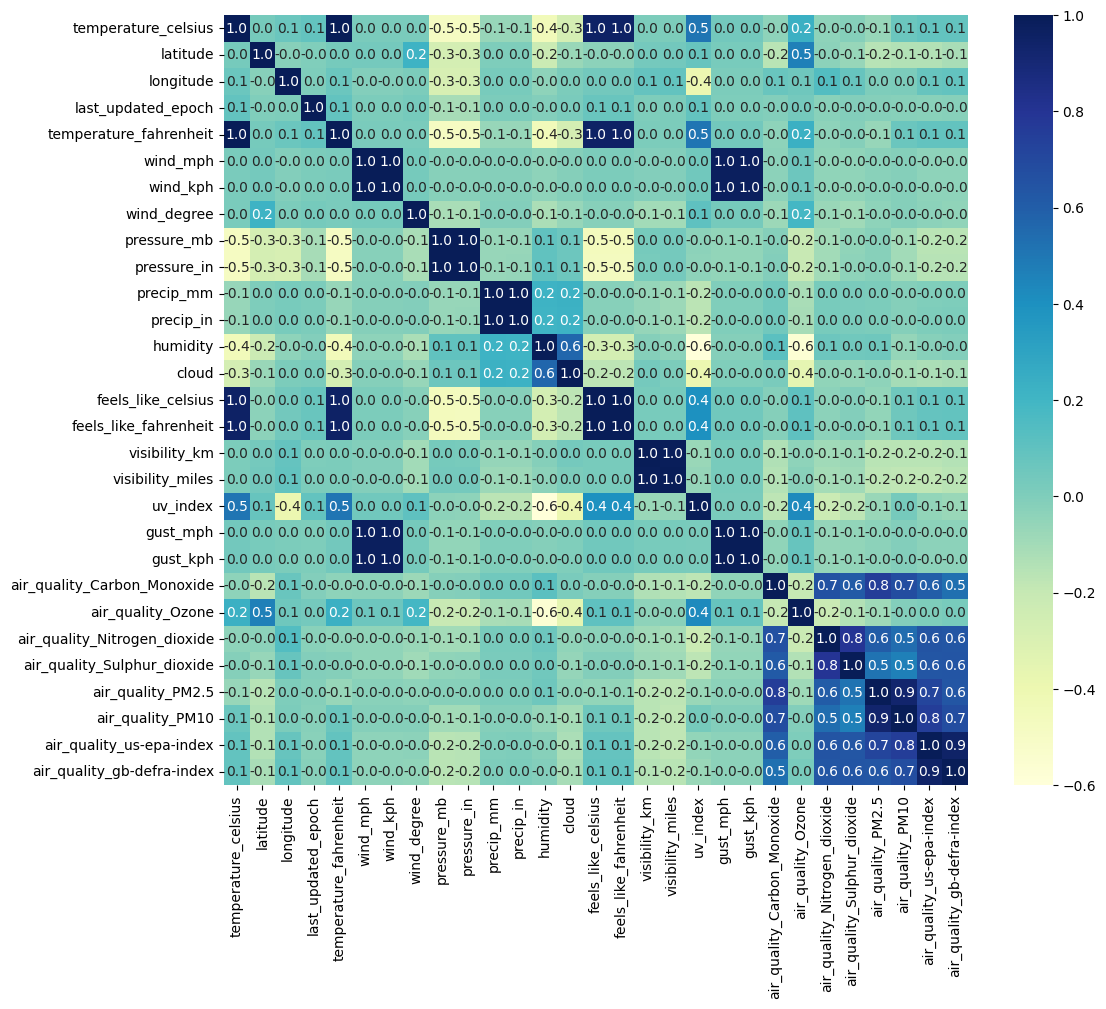

In [ ]:
plt.figure(figsize=(12, 10))
numeric_columns =  ['temperature_celsius',
                    'latitude',
                    'longitude',
                    'last_updated_epoch',
                    'temperature_fahrenheit',
                    'wind_mph',
                    'wind_kph',
                    'wind_degree',
                    'pressure_mb',
                    'pressure_in',
                    'precip_mm',
                    'precip_in',
                    'humidity',
                    'cloud',
                    'feels_like_celsius',
                    'feels_like_fahrenheit',
                    'visibility_km',
                    'visibility_miles',
                    'uv_index',
                    'gust_mph',
                    'gust_kph',
                    'air_quality_Carbon_Monoxide',
                    'air_quality_Ozone',
                    'air_quality_Nitrogen_dioxide',
                    'air_quality_Sulphur_dioxide',
                    'air_quality_PM2.5',
                    'air_quality_PM10',
                    'air_quality_us-epa-index',
                    'air_quality_gb-defra-index']
new_df2 = df[numeric_columns].corr()
sns.heatmap(new_df2, cmap='YlGnBu', annot=True, fmt='.1f')

#### *Histogramma yaratib eng kup sonliy gradusni kurib olamiz*

<Axes: xlabel='temperature_celsius', ylabel='Count'>

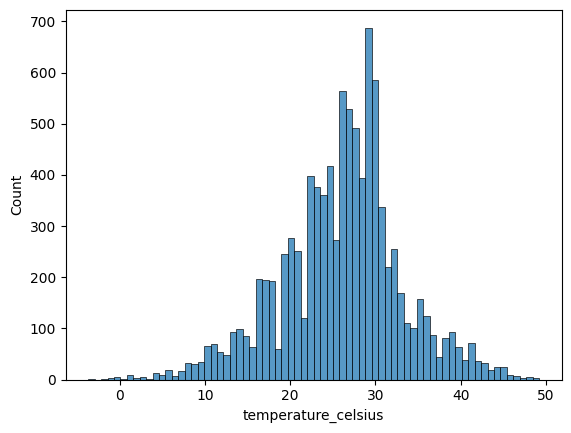

In [ ]:
sns.histplot(x='temperature_celsius', data=df)

##### *Umumiy davlatlar buyicha min, max, mean, std larni kramiz*

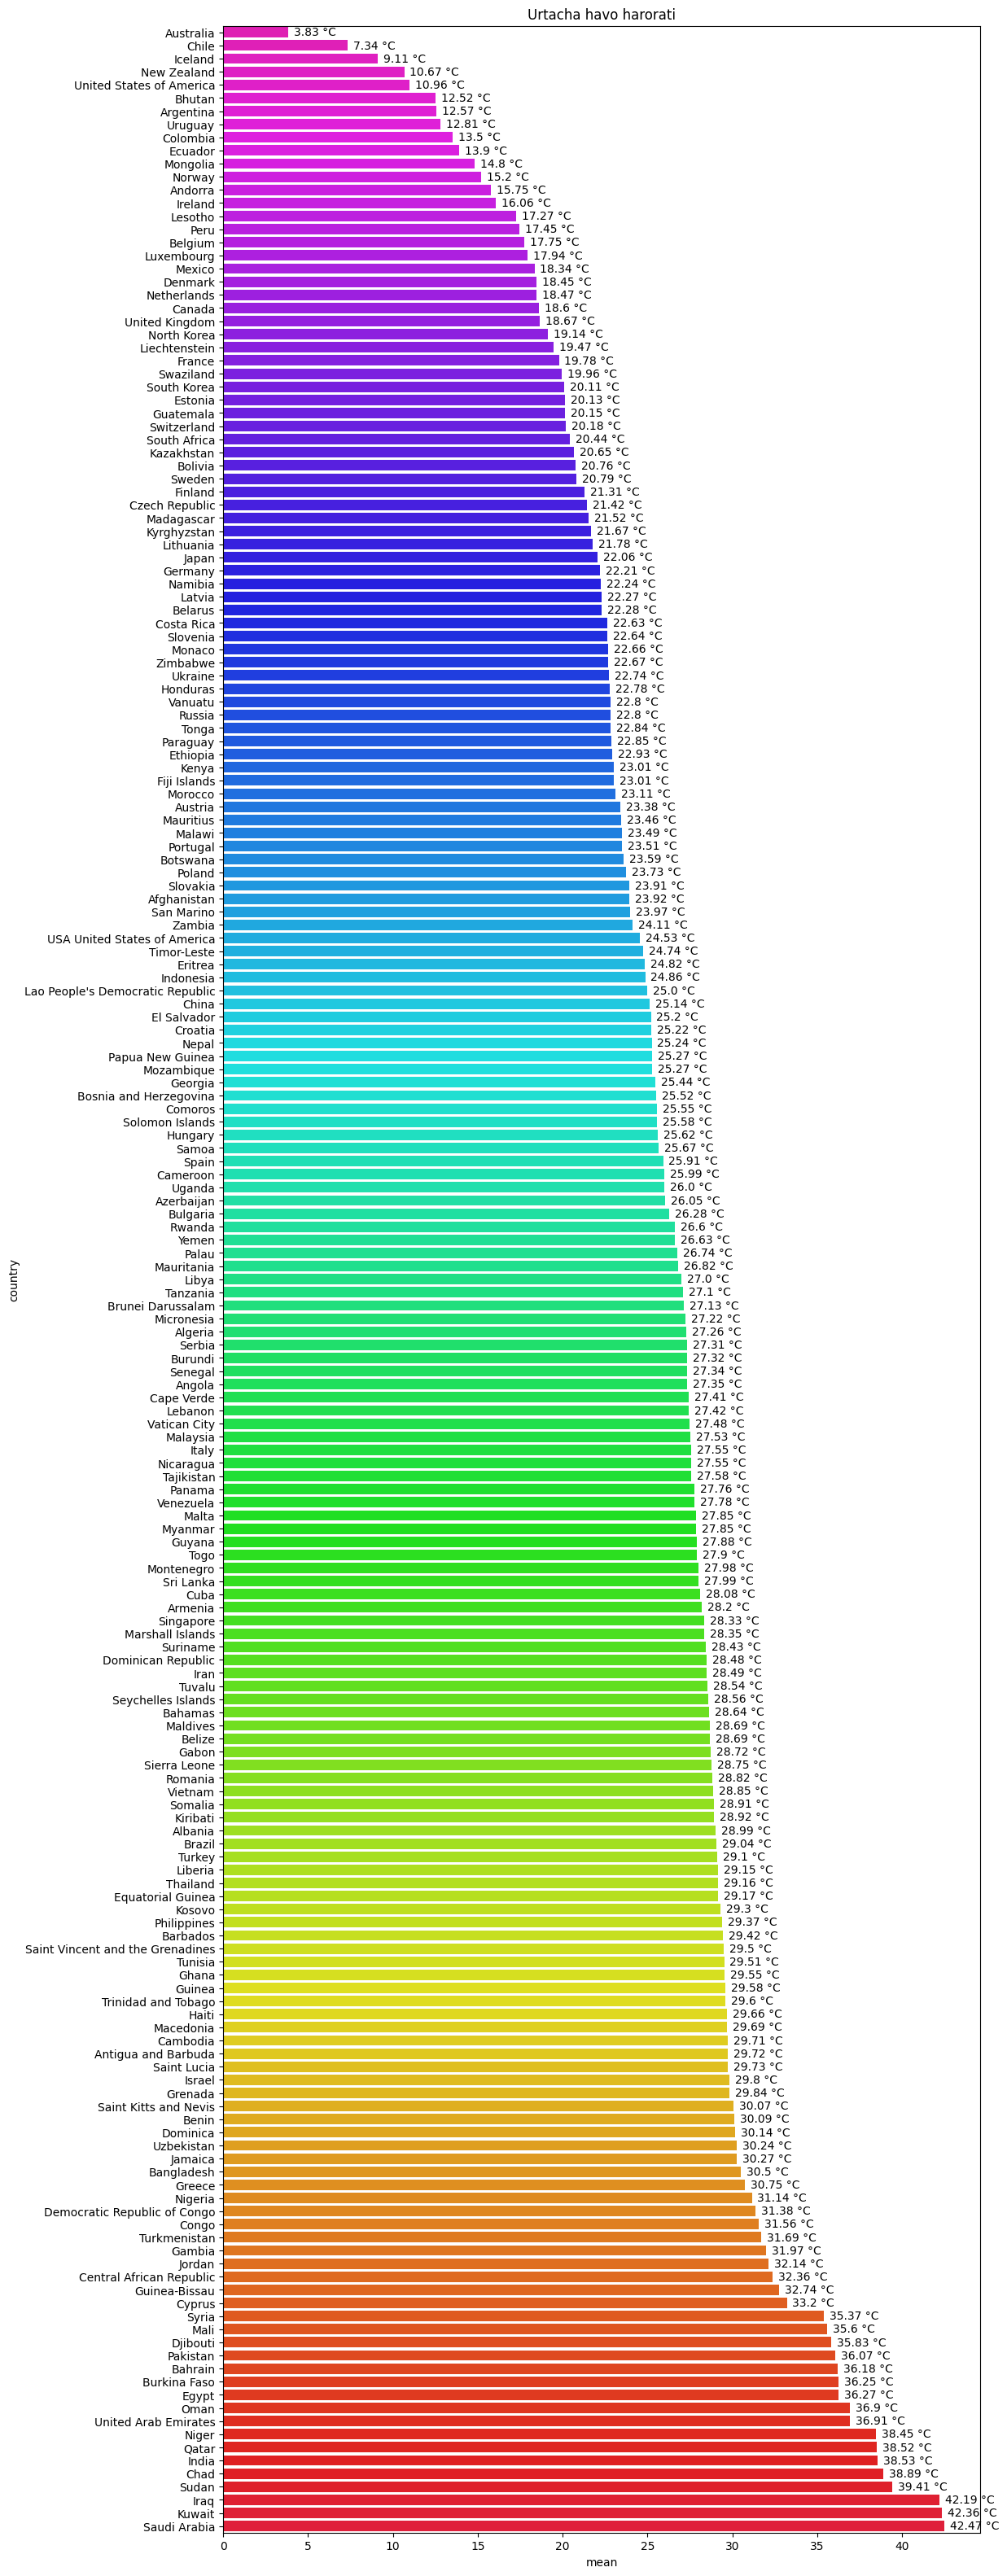

In [ ]:
top_temp_country = df.groupby('country')['temperature_celsius'].agg(['std', 'mean', 'max', 'min']).reset_index()

def write(ax):
    for i in ax.patches:
        ax.annotate(f'{round(i.get_width(), 2)} °C', (i.get_width(), i.get_y() + i.get_height() / 2),
                    ha='left', va='center', fontsize=10, xytext=(5, 0),
                    textcoords='offset points')


def put_barplot(title, x, y='country'):
    fig, ax = plt.subplots(figsize=(12, 40))
    sns.barplot(x=x, y=y, data=top_temp_country.sort_values(x), palette='gist_rainbow_r', ax=ax)
    write(ax)
    plt.title(title)

put_barplot('Urtacha havo harorati', 'mean')

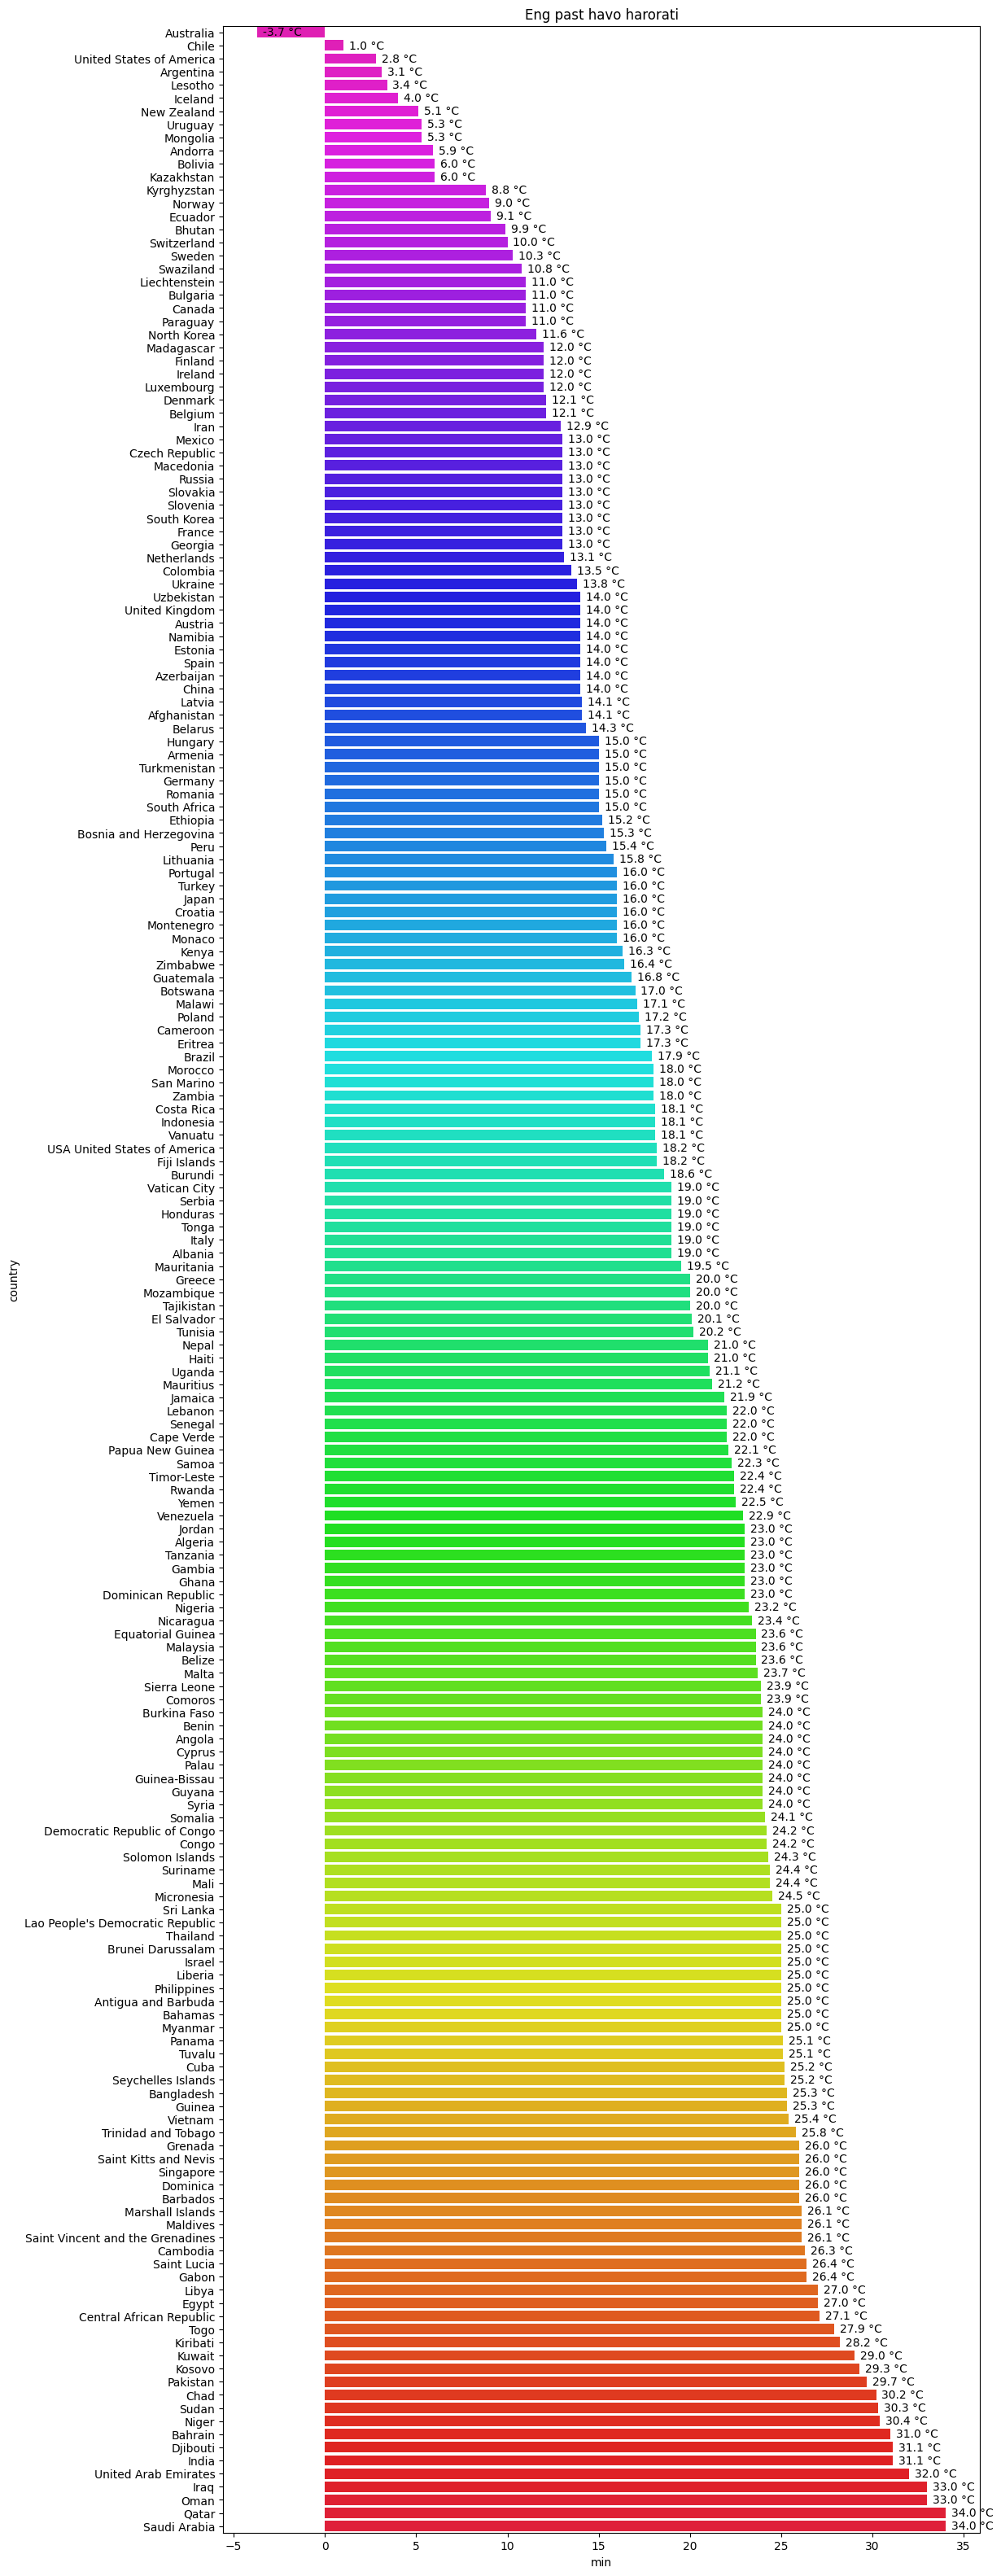

In [ ]:
put_barplot('Eng past havo harorati', 'min')

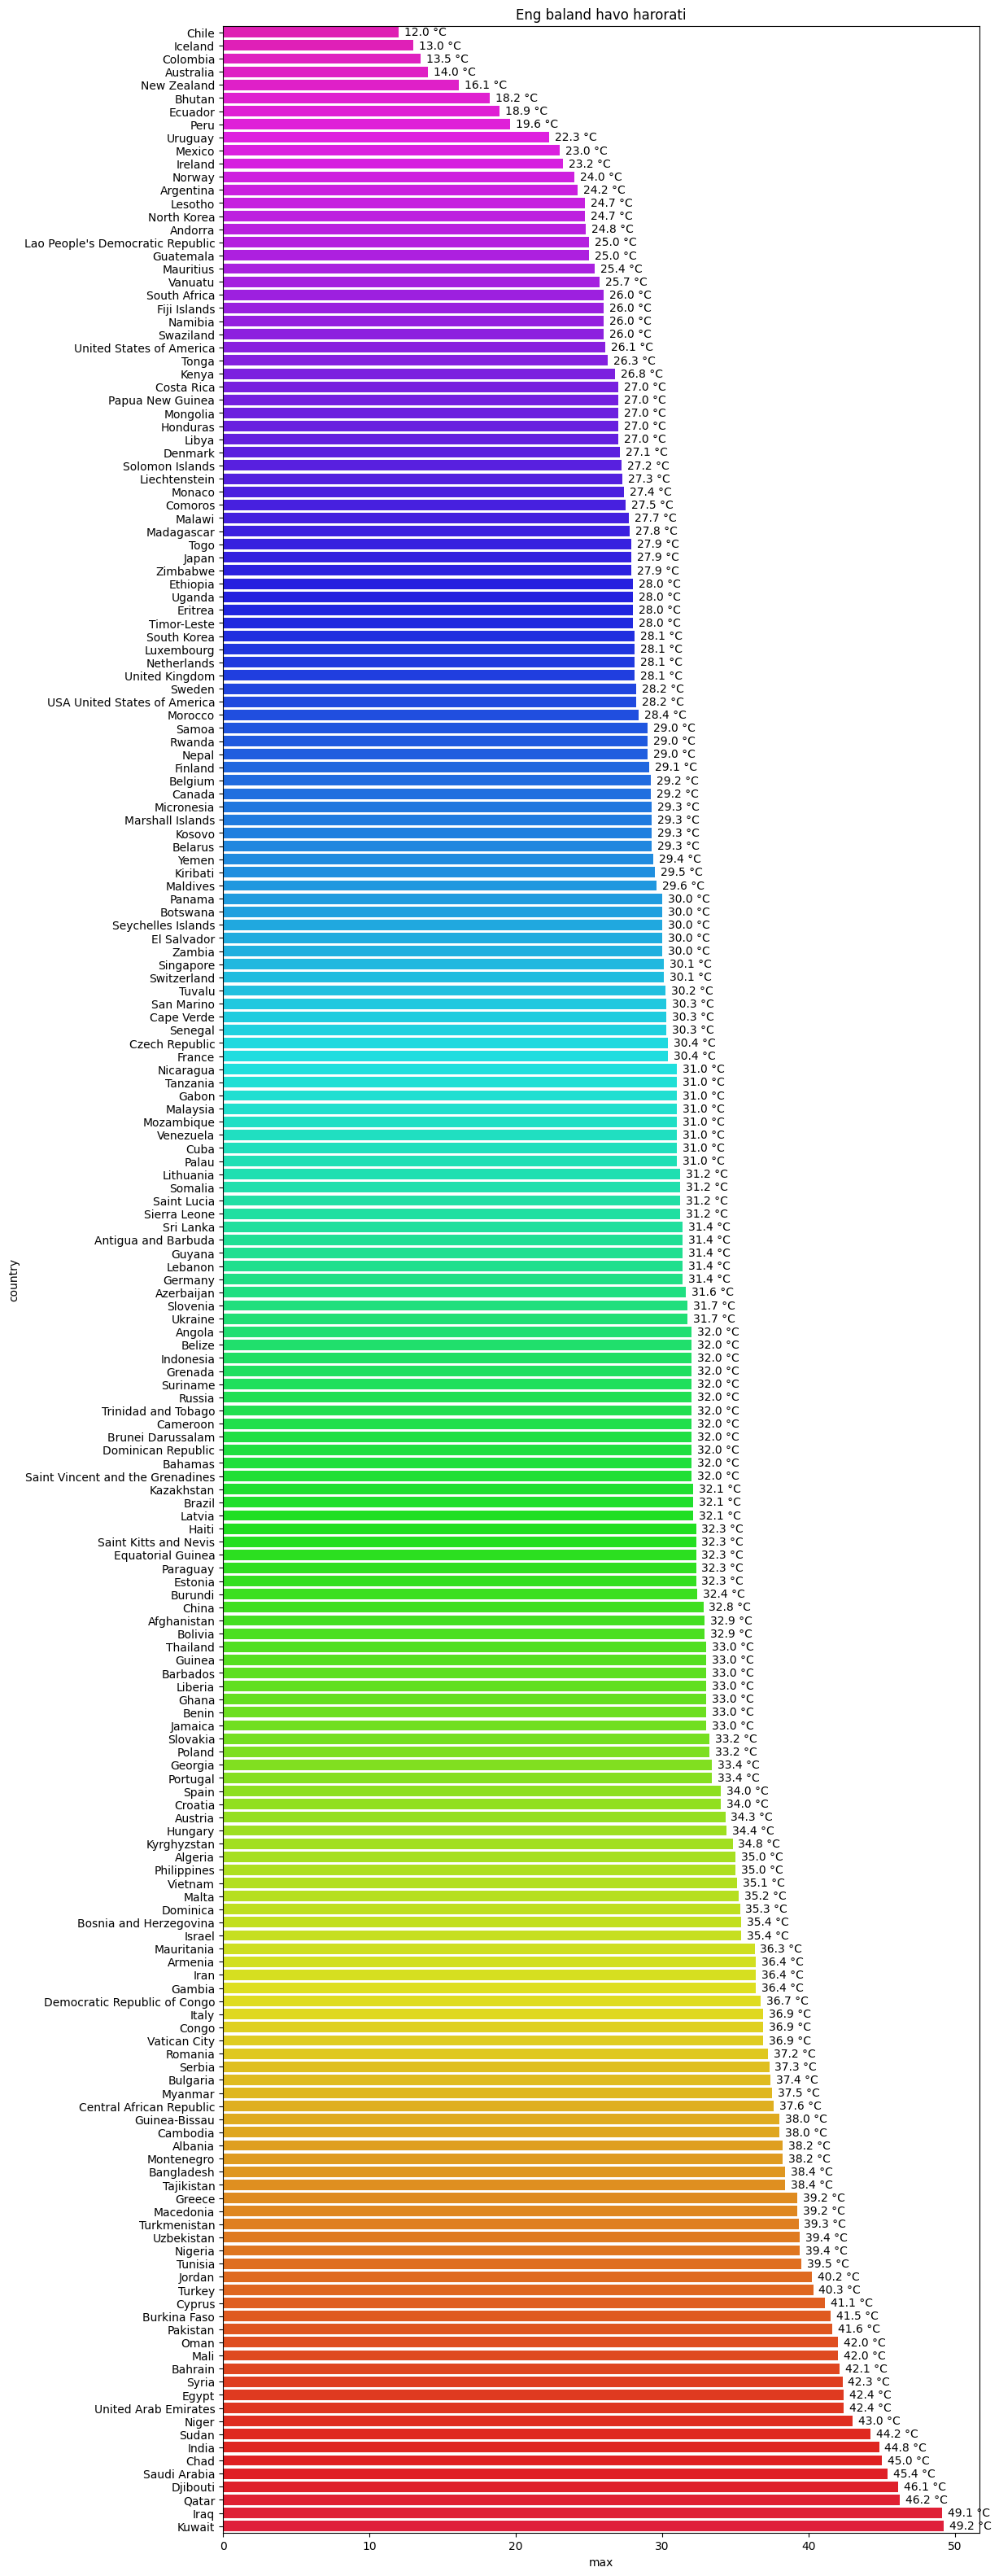

In [ ]:
put_barplot('Eng baland havo harorati', 'max')

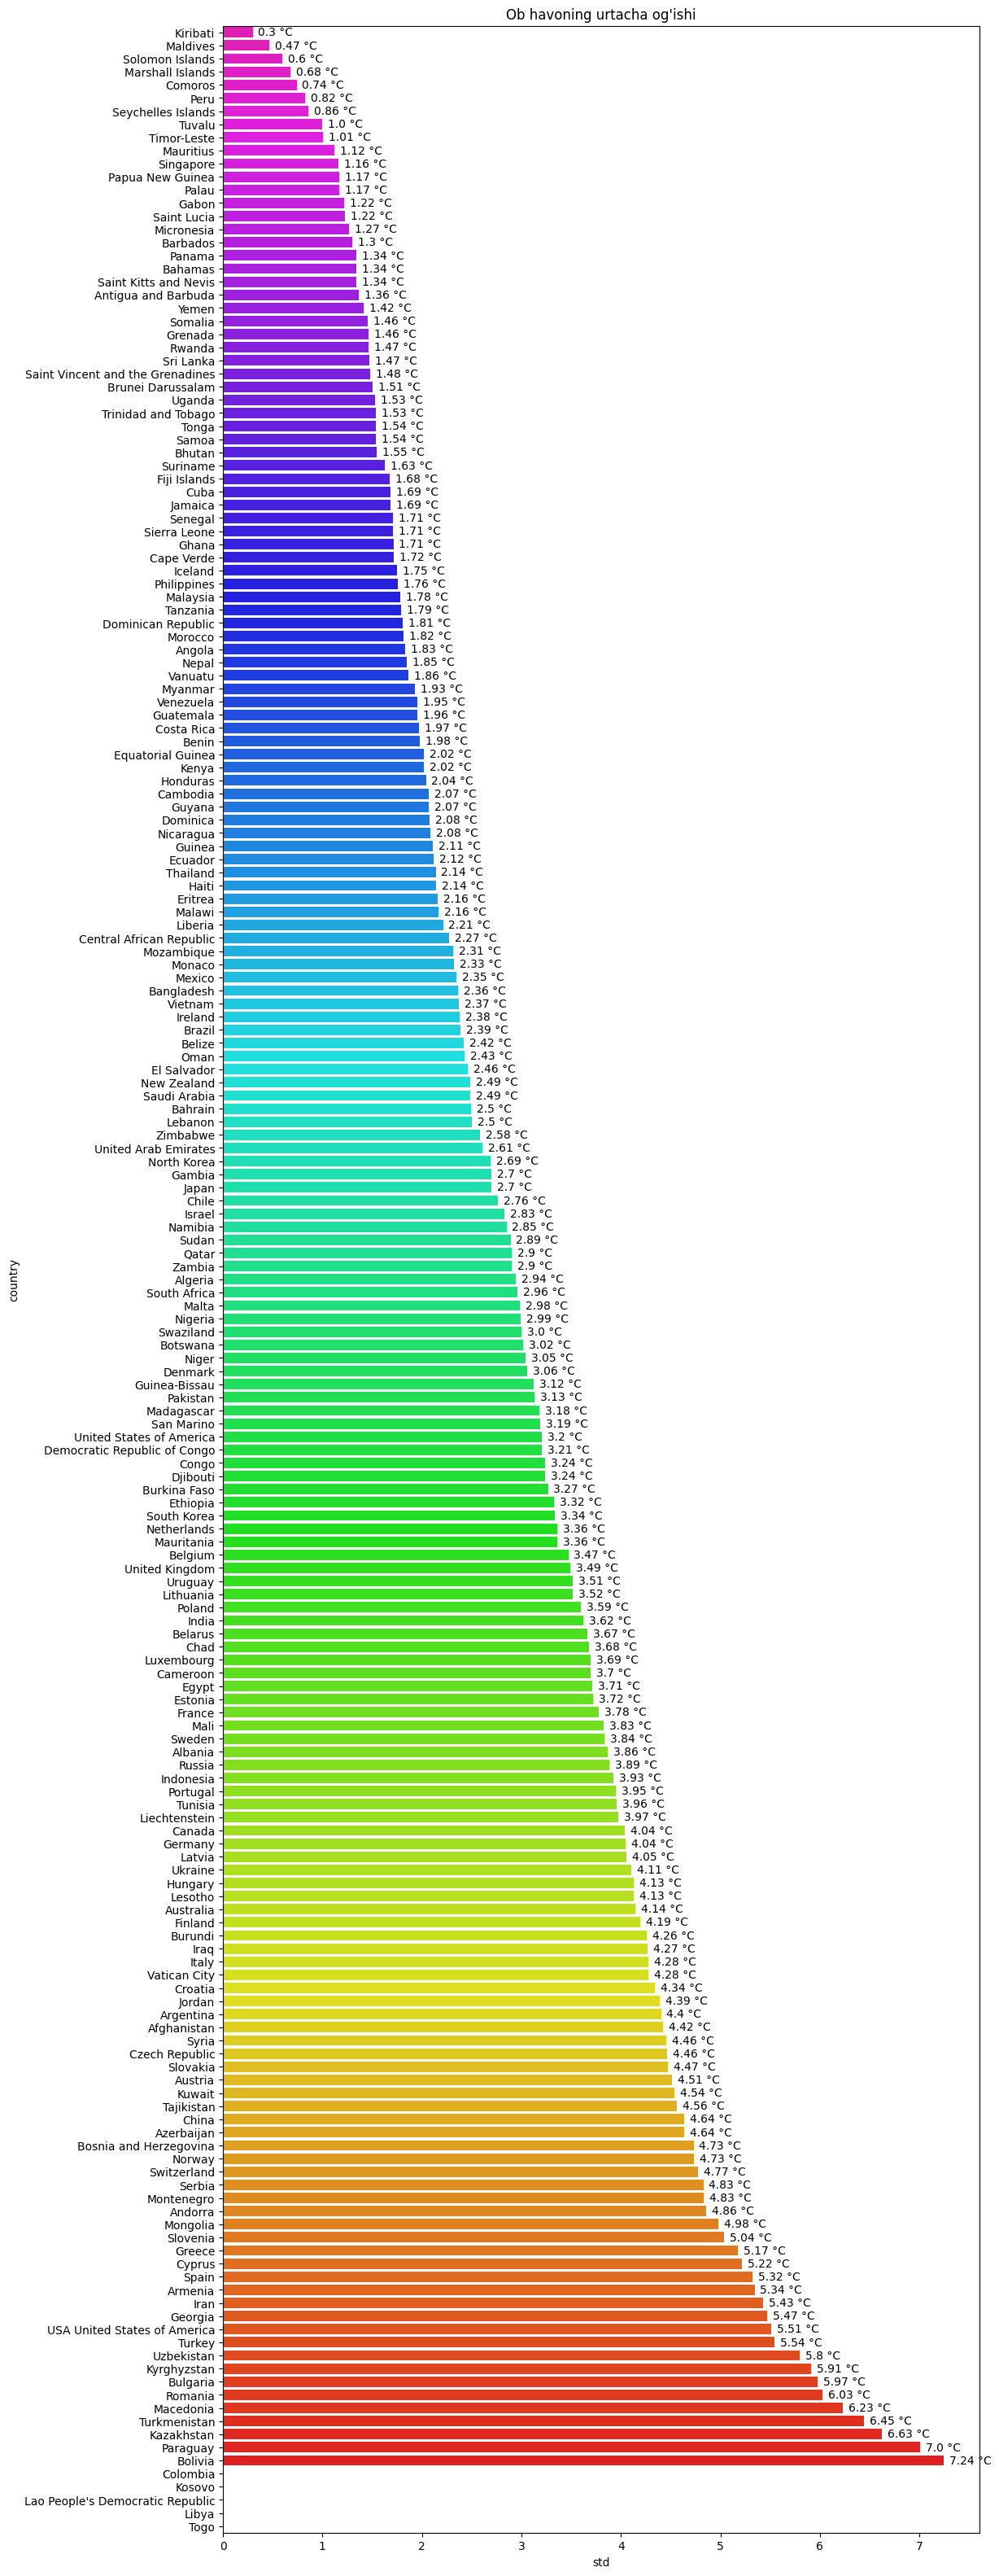

In [ ]:
put_barplot('Ob havoning urtacha og\'ishi', 'std')

##### esishning vaqtga nisbatini kuramiz

In [ ]:
df['date'] = pd.to_datetime(df['last_updated'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['days'] = df['date'].agg(lambda x: float(f'{x.month}.{x.day}'))

<Axes: xlabel='days', ylabel='temperature_celsius'>

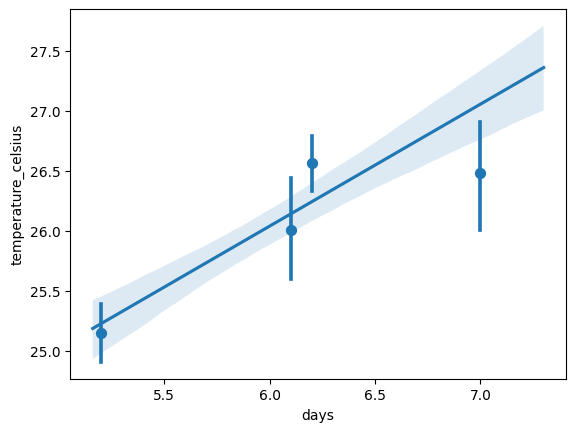

In [ ]:
x_bins = [5,0, 5.10, 5.20, 6.0, 6.10, 6.20, 7.0]
sns.regplot(x='days', y='temperature_celsius', data=df, x_bins=x_bins)


##### Oylar buyicha urtacha isiqlik

<Axes: xlabel='month_name', ylabel='temperature_celsius'>

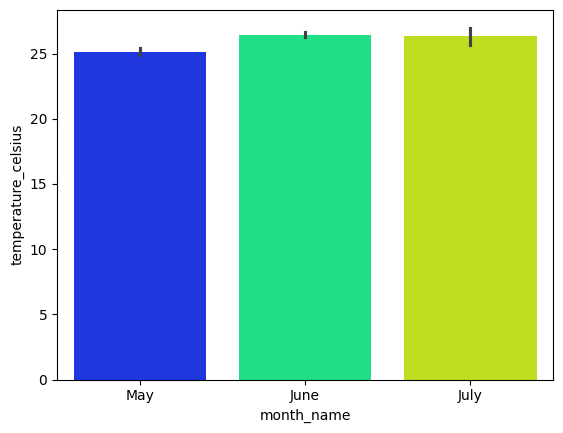

In [ ]:
df['month_name'] = df['date'].dt.month_name()
sns.barplot(x='month_name', y='temperature_celsius', data=df, palette='gist_rainbow_r')

#### shamol va issiqlikning bog'likligini kuramiz

<Axes: xlabel='temperature_celsius', ylabel='wind_degree'>

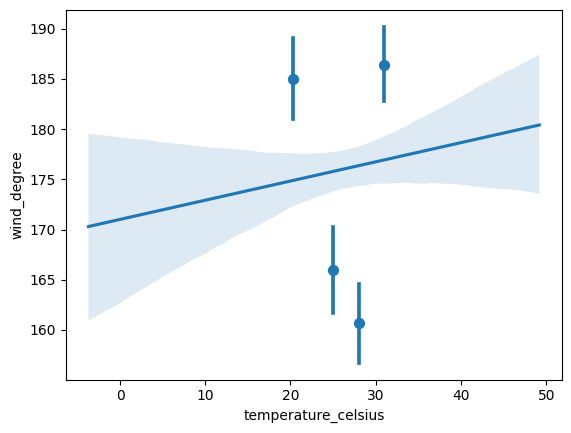

In [ ]:
sns.regplot(x="temperature_celsius", y="wind_degree", data=df, x_bins=4)

##### Mintaqalar buyicha issiqlikni kuramiz

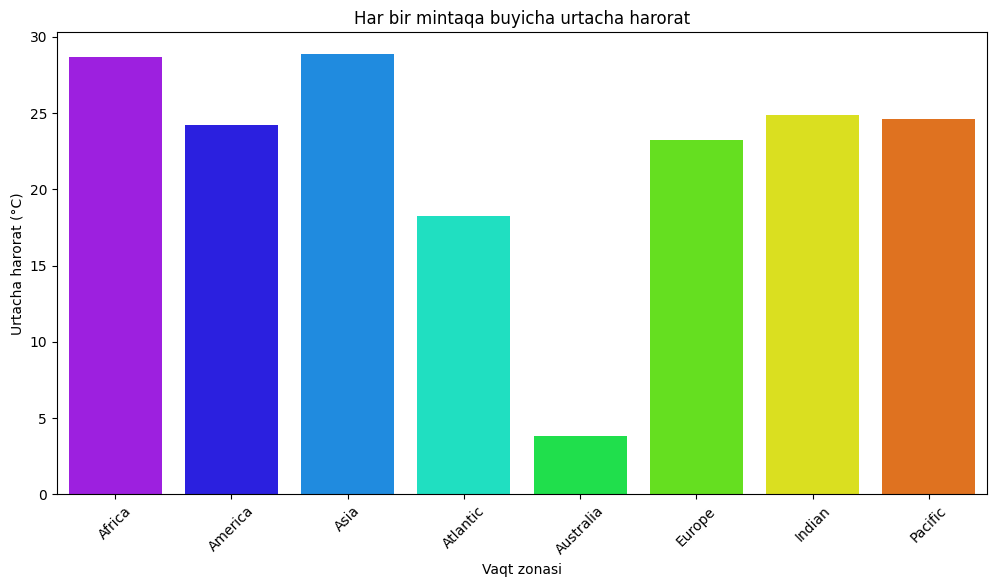

In [ ]:
df['zone'] = df['timezone'].agg(lambda x: x.split('/')[0])

zone = df.groupby('zone')['temperature_celsius'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='zone',
            y='temperature_celsius',
            data=zone,
            palette='gist_rainbow_r')
plt.title('Har bir mintaqa buyicha urtacha harorat')
plt.xlabel('Vaqt zonasi')
plt.ylabel('Urtacha harorat (°C)')
plt.xticks(rotation=45)
plt.show()

##### Soat buyicha urtacha issiqlik farqini mintaqalar kesimida kuramiz

In [ ]:
df['hour'] = pd.to_datetime(df['last_updated']).dt.hour

In [ ]:

fig = px.density_heatmap(df,
                         x='hour',
                         y='location_name',
                         z='temperature_celsius',
                         title='Soatbay Heatmap')
fig.show()

#### Xaritada har bir uskuna joylashgan joy buyicha issiqlikni kuarmiz

In [ ]:
fig = px.scatter_mapbox(df,
                        lat='latitude',
                        lon='longitude',
                        hover_name='location_name',
                        color='temperature_celsius',
                        title='Temperature Map')
fig.update_layout(mapbox_style='open-street-map')
fig.show()


#### Umimiy davlat buyicha issiqlikni ranglar buyicha kuramiz

In [ ]:
map_data = df[['country', 'temperature_celsius']]


map_data_avg = map_data.groupby('country').mean().reset_index()


fig = px.choropleth(
    map_data_avg,
    locations='country',
    locationmode='country names',
    color='temperature_celsius',
    title='Harorat xaritasi',
    labels={'temperature_celsius': 'Harorat (°C)'},
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show()